# Kurapati Venkatesh
# 09012021
# Topic: k - Nearest Neighbors(kNN)

# ---------------------------------------------------------------------------

## Problem Statement:

## National Park, in India is dealing with a problem of segregation of its species based on the different attributes it has so that they can have cluster of species together rather than  manually classify them, they have taken painstakingly  collected the data and would like you to help them out with a classification model for their  business objective to be achieved, by using KNN Algorithm  classify the different species and draft your inferences in the documentation

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To classify new data point(new species) using KNN Algorithm

## -------------------------------------------------------------------------------------------

##### Data Set Information:

##### A simple database containing 17 Boolean-valued attributes. The "type" attribute appears to be the class attribute. Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)
Class# -- Set of animals:
====== ====================================================

1 -- (41) aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf

2 -- (20) chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren

3 -- (5) pitviper, seasnake, slowworm, tortoise, tuatara

4 -- (13) bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna

5 -- (4) frog, frog, newt, toad

6 -- (8) flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp

7 -- (10) clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm

##### * Attribute Information:
1. animal name: Unique for each instance
2. hair: Boolean
3. feathers: Boolean
4. eggs: Boolean
5. milk: Boolean
6. airborne: Boolean
7. aquatic: Boolean
8. predator: Boolean
9. toothed: Boolean
10. backbone: Boolean
11. breathes: Boolean
12. venomous: Boolean
13. fins: Boolean
14. legs: Numeric (set of values: {0,2,4,5,6,8})
15. tail: Boolean
16. domestic: Boolean
17. catsize: Boolean
18. type: Numeric (integer values in range [1,7])

## ---------------------------------------------------------------------------------------------------------------------------

## Load dependencies and data:

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
%matplotlib inline

## 1. Read Data:

In [2]:
#load data
df = pd.read_csv(r"G:\360digit\assignments meterial\ML-KNN\zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# value count for glass types
df.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### 2. Data Prepocessing:

In [6]:
#check if there is null value
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
print(df.type.unique())

[1 4 2 7 6 5 3]


In [8]:
duplicates = df.duplicated()
duplicates[duplicates > 1]

Series([], dtype: bool)

In [9]:
#check if there are duplicates in animal_name
duplicates = df["animal name"].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [10]:
#select these duplicates frog to see the data

frog = df.loc[df['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [11]:
#find that one frog is venomous and another one is not
#change the venomous one into venoumous_frog to seperate 2 kinds of frog
df['animal name'][(df.venomous == 1 ) & (df['animal name'] == 'frog')] = "venoumous_frog"

<ipython-input-11-28f9e6e9af7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['animal name'][(df.venomous == 1 ) & (df['animal name'] == 'frog')] = "venoumous_frog"


## Data exploration and visualizaion:

### correlation matrix:

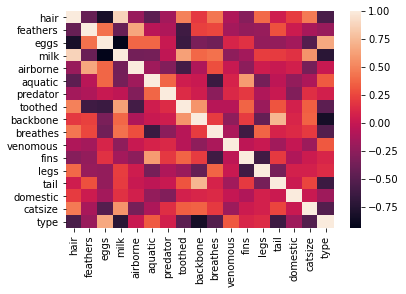

In [12]:
cor = df.corr()
sns.heatmap(cor)

No clarity

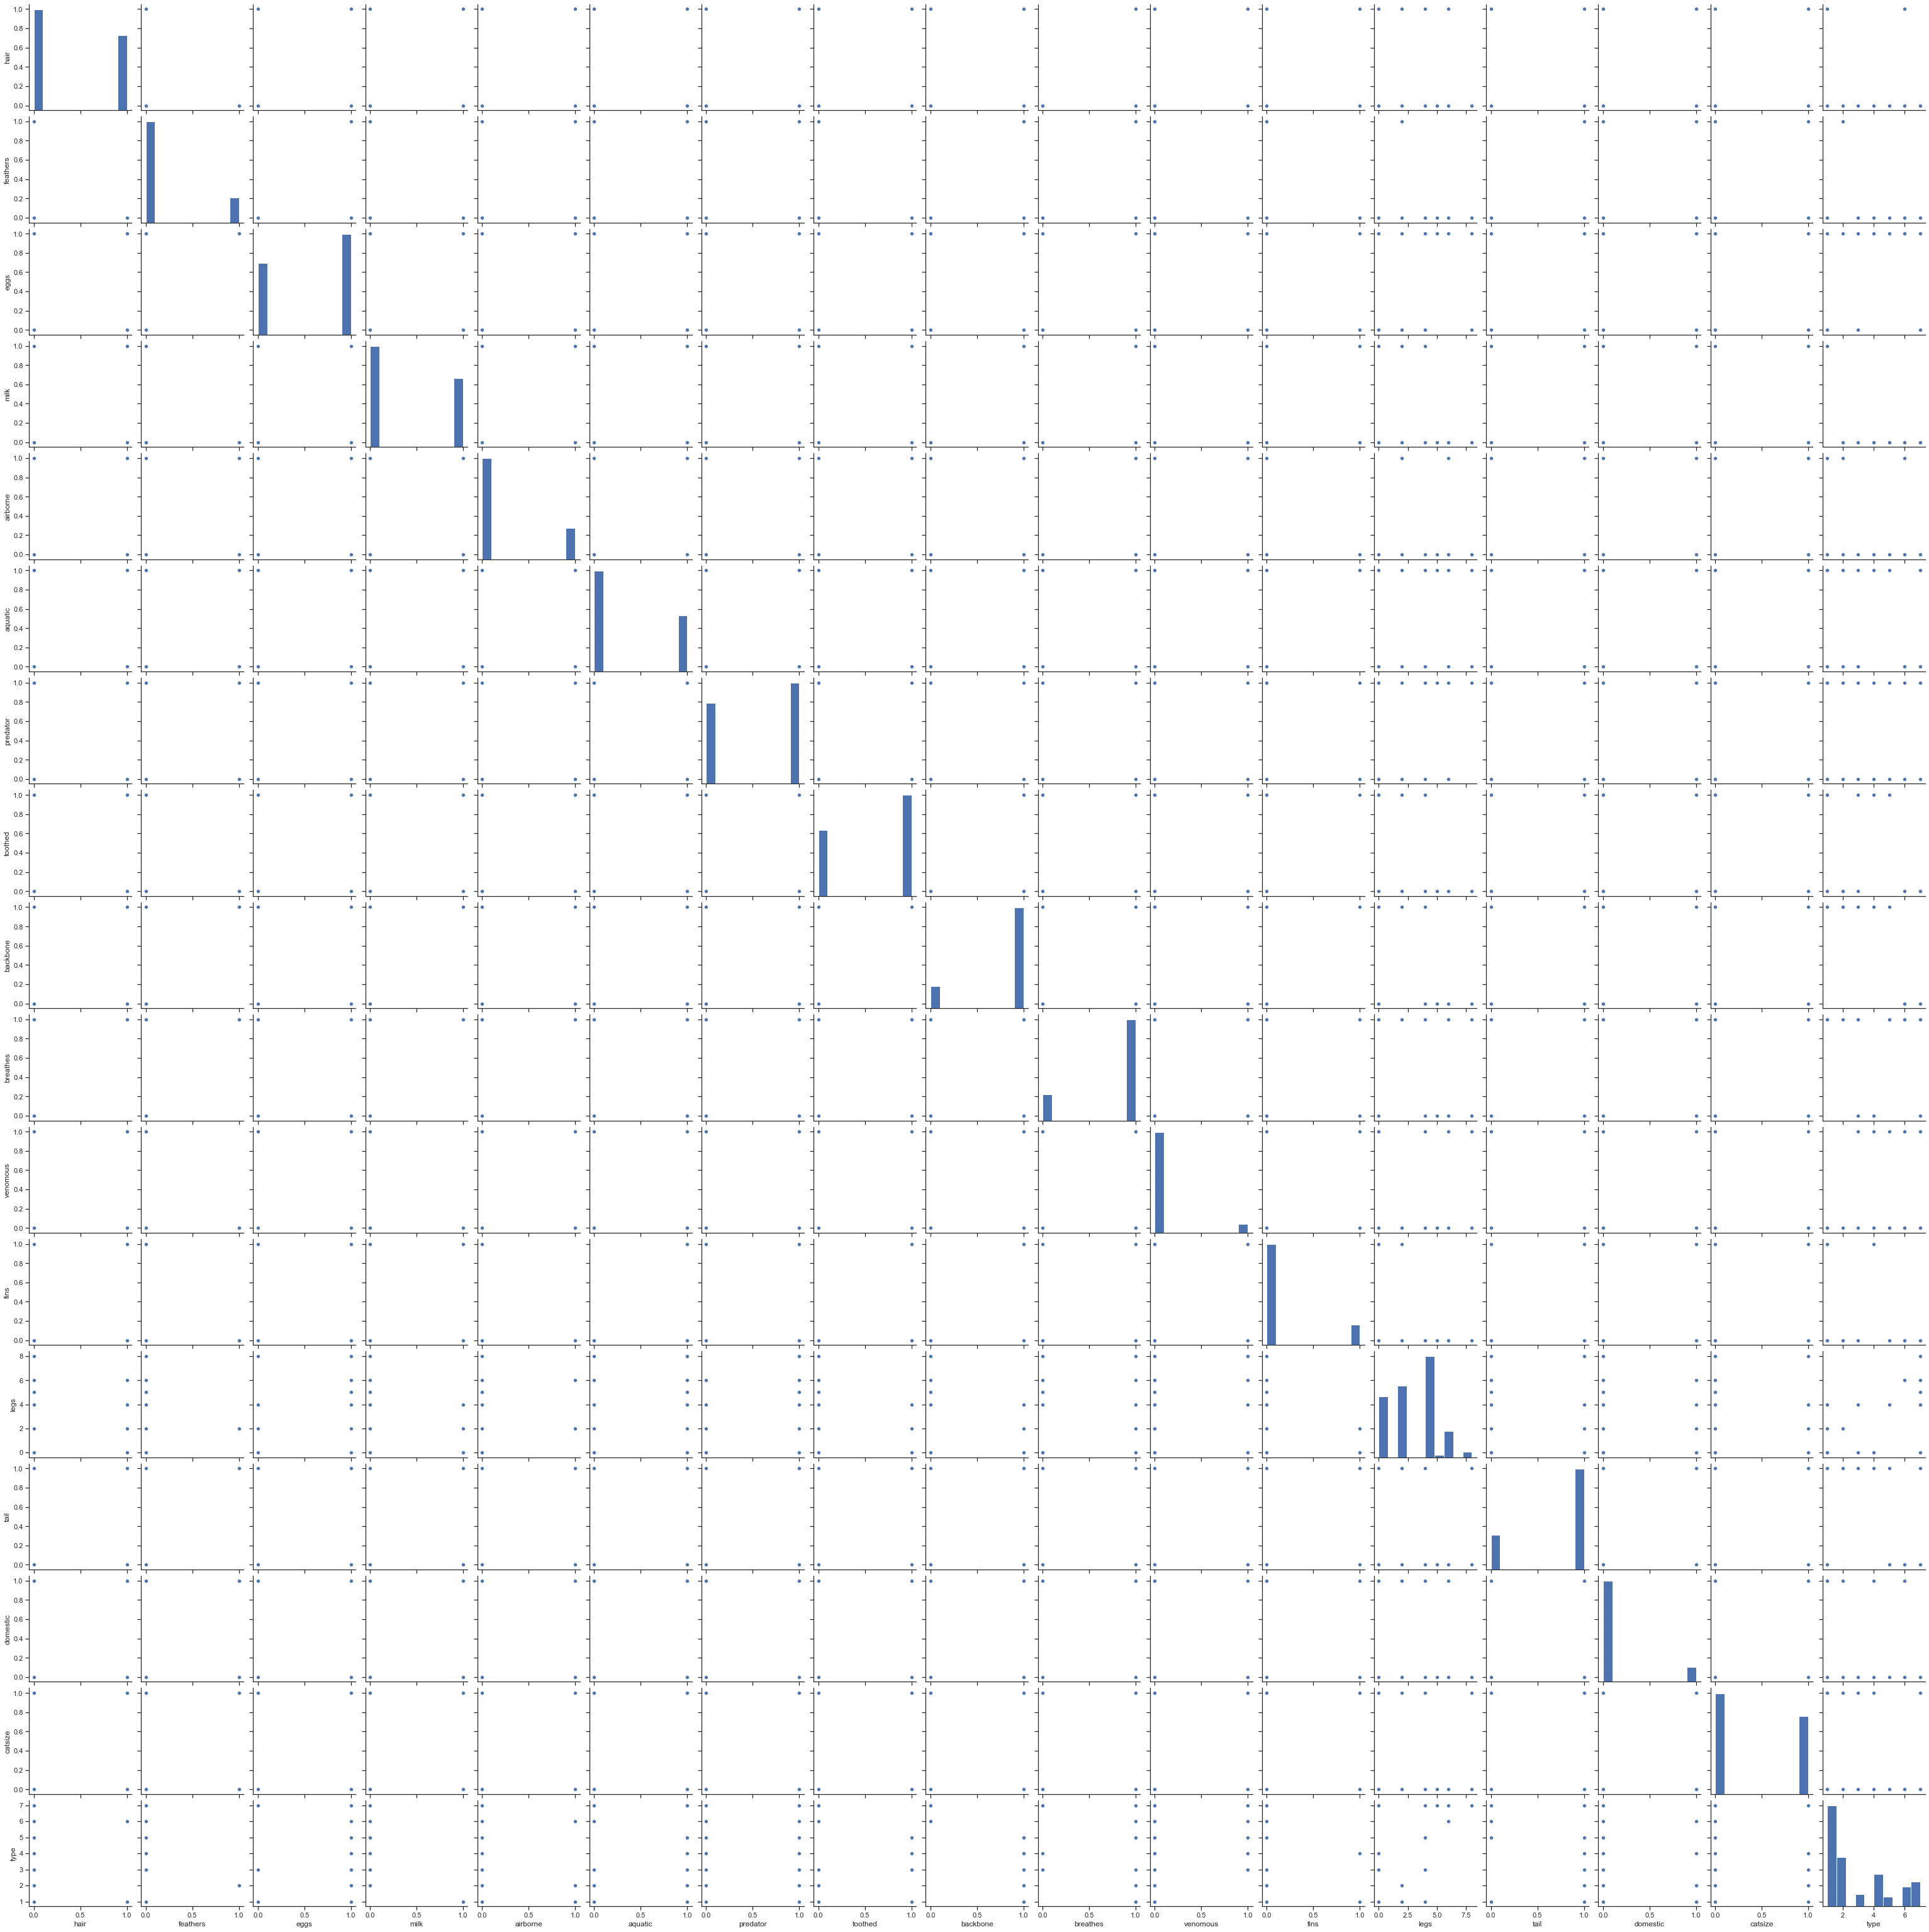

In [13]:
#pairwise plot of all the features
import seaborn as sns

sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df)


import matplotlib.pyplot as plt
plt.show()


The pairplot shows that the data is binary and KNN can be applied to get nearest neighbors and classify the animals types.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


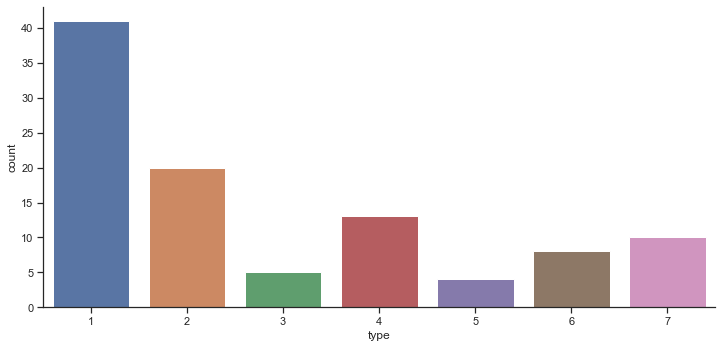

In [14]:
#use seaborn to plot the number of each type
sns.factorplot('type', data=df, kind="count",size = 5,aspect = 2)

## --------------------------------------------------------------------------------------------

### Scaling:

In [15]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())
    / (i.max()-i.min())
    return (x)

In [16]:
# Normalized data frame (dropping the Type column)
df_n = norm_func(df.iloc[:, 1:17])
df_n.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


In [17]:
X = np.array(df_n.iloc[:,1:17]) # Predictors 

In [18]:
Y = np.array(df['type']) # Target 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### Applying KNN:

* Drop features that are not required( not done )
* Use random state while splitting the data to ensure reproducibility and consistency
* Experiment with distance metrics - Euclidean, manhattan

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=21)

In [21]:
pred = knn.predict(X_test)
pred

array([4, 4, 1, 6, 4, 2, 2, 4, 1, 4, 1, 4, 2, 2, 2, 1, 2, 1, 1, 4, 1],
      dtype=int64)

### Evaluate the model:

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred))
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 

0.6190476190476191


Predictions,1,2,4,6
Actual,,,,
1,4,1,1,0
2,0,5,0,0
3,0,0,1,0
4,0,0,3,0
5,2,0,0,0
6,0,0,0,1
7,1,0,2,0


#### error on train data:

In [23]:
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train, pred_train))
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

0.8


Predictions,1,2,4,6
Actual,,,,
1,32,1,2,0
2,0,15,0,0
3,2,0,2,0
4,0,0,10,0
5,2,0,0,0
6,0,0,0,7
7,1,0,2,4


In [24]:
# creating empty list variable 
acc = []

* running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and storing the accuracy values

In [25]:
for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])

##### train accuracy plot:

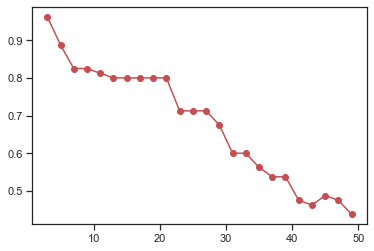

In [26]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

##### test accuracy plot:

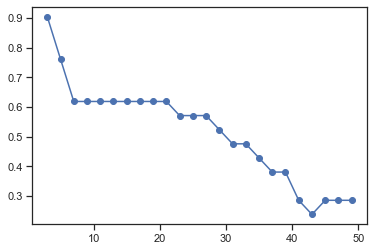

In [27]:
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")

###### From the above plots, it's clear that the initial values of k yeilds best test and train accuracy scores. For better understanding, we will try this algorithm in different way as follows.

## ---------------------------------------------------------------------------------------------------------

##  we can do this in another way

## --------------------------------------------------------------------------------------------------------------

### Feature Scaling

Scaling is necessary for distance-based algorithms such as KNN. This is to avoid higher weightage being assigned to data with a higher magnitude.

* Using standard scaler we can scale down to unit variance.

##### Formula:

* z = (x - u) / s

* where x -> value, u -> mean, s -> standard deviation

In [28]:
scaler = StandardScaler()

In [44]:
df1 = df.drop(['animal name', 'type'],axis=1)

In [45]:
df1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
scaler.fit(df1)

StandardScaler()

In [48]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [49]:
#perform transformation
scaled_features = scaler.transform(df1)
scaled_features

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [50]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[1:17])
df_feat.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


## Applying KNN:

* Drop features that are not required
* Use random state while splitting the data to ensure reproducibility and consistency
* Experiment with distance metrics - Euclidean, manhattan

In [55]:
X_train,X_test,y_train,y_test  = train_test_split(df1,df['type'],test_size=0.3,random_state=45)
#setting random state ensures split is same eveytime, so that the results are comparable

In [56]:
knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

In [57]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [58]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [59]:
y_pred = knn.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00         2
           4       0.50      1.00      0.67         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

    accuracy                           0.90        31
   macro avg       0.75      0.82      0.77        31
weighted avg       0.89      0.90      0.89        31



With this setup, We found the accuracy to be 90%

#### Finding the best K value:

We can do this either -

* by plotting Accuracy
* or by plotting the error rate

Note that plotting both is not required

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_se

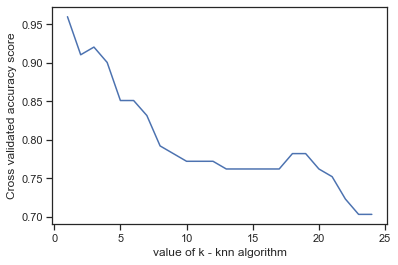

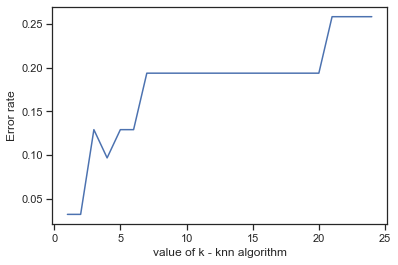

In [64]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,df1,df['type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

##### we can see that k = 3 produces the most accurate results

### Findings :-

* Euclidean distance produced better results 
* Applying feature scaling improved accuracy.
* The best k value was found to be 3.

#### Further improvements :-

We can see that the model can be improved further so we get better accuracy. 

Some suggestions -

* Using KFold Cross-validation
* Try different algorithms to find the best one for this problem - (SVM, Random forest, etc)